In [1]:
import numpy as np

### The function below takes a parameter which should be the total number of treatments/criterions (for example, if we consider AB and first order, we will have 4 criterions [AA, AB, BA, BB], so the number of input should be 4) and return a william's latin square in dictionary format. (if input number is odd, return the whole latin square, if even, return first half, second half and the whole latin square).

In [2]:
import string
from random import shuffle

def will_latin(num):
    """
    Parameters:
    ----------------
    
    num: numbers of treatments
    """
    first_arr = {}
    second_arr = {}
    # Select the names(numbers) that need to be used by the given number
    letter_to_use = []
    for i in range(num):
        letter_to_use.append(i)
    shuffle(letter_to_use)
    reverse_letters = letter_to_use[::-1]
    for i in range(num):
        # Construct the right order sequence
        right_order = letter_to_use[i:] + letter_to_use[0:i]
        first_arr[i] = right_order
        # The reverse order sequence
        second_arr[i] = right_order[::-1]
    
    # After construct the two sequence, now we start to build the william's Latin square
    final_arr = {}
    for i in range(num):
        final_arr[i] = []
        for j in range(2 * num):
            if j % 2 == 0:
                final_arr[i].append(first_arr[i][j // 2])
            else:
                final_arr[i].append(second_arr[i][j // 2])
    
    # Now we need to consider the given number is even or odd
    if num % 2 == 0:
        arr_1 = {}
        arr_2 = {}
        for key in final_arr:
            arr_1[key] = final_arr[key][0:num]
            arr_2[key] = final_arr[key][num:]
        return arr_1, arr_2, final_arr
    else: # num is odd
        return final_arr

### Below is two demos, 1 for first order, 1 for second order. 
See that the latin square is in dictionary format, for example, 0: [0, 3, 1, 2] means this is the first row, and the elements in this row are 0,3,1,2. We could define 0 means AA, 1 means AB, 2 means BA, 3 means BB, so that the sequence of this row should be AABBABBA.<br>
The second demo is very similar, the only difference is that now we have 8 treatments/criterions, we still could assign 0 means AAA, 1 means AAB, 2 means ABA and etc... and then get the full sequence.

In [3]:
# Below is a demo for first order with AB
array_dict1, array_dict2, all_array_dict = will_latin(4)
print("first half of latin square: {}".format(array_dict1))
print()
print("second half of latin square: {}".format(array_dict2))
print()
print("whole latin square: {}".format(all_array_dict))

first half of latin square: {0: [2, 3, 1, 0], 1: [1, 2, 0, 3], 2: [0, 1, 3, 2], 3: [3, 0, 2, 1]}

second half of latin square: {0: [0, 1, 3, 2], 1: [3, 0, 2, 1], 2: [2, 3, 1, 0], 3: [1, 2, 0, 3]}

whole latin square: {0: [2, 3, 1, 0, 0, 1, 3, 2], 1: [1, 2, 0, 3, 3, 0, 2, 1], 2: [0, 1, 3, 2, 2, 3, 1, 0], 3: [3, 0, 2, 1, 1, 2, 0, 3]}


In [4]:
# Similarly, do a demo for second order
array_dict1, array_dict2, all_array_dict = will_latin(8)
print("first half of latin square: {}".format(array_dict1))
print()
print("second half of latin square: {}".format(array_dict2))
print()
print("whole latin square: {}".format(all_array_dict))

first half of latin square: {0: [3, 6, 5, 1, 7, 4, 0, 2], 1: [5, 3, 7, 6, 0, 1, 2, 4], 2: [7, 5, 0, 3, 2, 6, 4, 1], 3: [0, 7, 2, 5, 4, 3, 1, 6], 4: [2, 0, 4, 7, 1, 5, 6, 3], 5: [4, 2, 1, 0, 6, 7, 3, 5], 6: [1, 4, 6, 2, 3, 0, 5, 7], 7: [6, 1, 3, 4, 5, 2, 7, 0]}

second half of latin square: {0: [2, 0, 4, 7, 1, 5, 6, 3], 1: [4, 2, 1, 0, 6, 7, 3, 5], 2: [1, 4, 6, 2, 3, 0, 5, 7], 3: [6, 1, 3, 4, 5, 2, 7, 0], 4: [3, 6, 5, 1, 7, 4, 0, 2], 5: [5, 3, 7, 6, 0, 1, 2, 4], 6: [7, 5, 0, 3, 2, 6, 4, 1], 7: [0, 7, 2, 5, 4, 3, 1, 6]}

whole latin square: {0: [3, 6, 5, 1, 7, 4, 0, 2, 2, 0, 4, 7, 1, 5, 6, 3], 1: [5, 3, 7, 6, 0, 1, 2, 4, 4, 2, 1, 0, 6, 7, 3, 5], 2: [7, 5, 0, 3, 2, 6, 4, 1, 1, 4, 6, 2, 3, 0, 5, 7], 3: [0, 7, 2, 5, 4, 3, 1, 6, 6, 1, 3, 4, 5, 2, 7, 0], 4: [2, 0, 4, 7, 1, 5, 6, 3, 3, 6, 5, 1, 7, 4, 0, 2], 5: [4, 2, 1, 0, 6, 7, 3, 5, 5, 3, 7, 6, 0, 1, 2, 4], 6: [1, 4, 6, 2, 3, 0, 5, 7, 7, 5, 0, 3, 2, 6, 4, 1], 7: [6, 1, 3, 4, 5, 2, 7, 0, 0, 7, 2, 5, 4, 3, 1, 6]}


### Below is a function for initializing an experiment.
It takes two parameter, num_of_treatments and order_to_consider. num_of_treatments is the letters you want to use, for example, if only consider AB, this number should be 2, if consider ABCDE, the number would be 5. order_to_consider means what we want to test, enter "first" to consider first order only, enter "second" to consider second order. What this function does is that after user selected the two paramters, say 2 and second order, then it will start to list out all the combinations of AB in second order, i.e., [AAA, AAB, ABA, ABB, BAA, BAB, BBA, BBB]. Then it will use the total number of these combinations to construct a William's latin square. This function will also assign a name for each combination, e.g., 0 for AAA, 1 for AAB, 2 for ABA and etc and store this relationship in a dictionary.

In [5]:
from itertools import product

def initiation(num_of_treatments, order_to_consider):
    """
    Parameters:
    ----------------
    
    num_of_treatments: numbers of single treatments (eg: [AB] is 2 and [ABC] is 3)
    order_to_consider: consider second order or only first order
    
    Return:
    ----------------
    var_dict: a dict indicating relationship between number and the sequenct it represent
    array_dicts: the sequence constructed by william's latin square
    """
    all_letters = string.ascii_uppercase
    total_comb = num_of_treatments ** 2 # if only consider first order
    if "second" in order_to_consider:
        total_comb = total_comb * num_of_treatments
        prods = product(all_letters[:num_of_treatments], repeat = 3)
    else:
        prods = product(all_letters[:num_of_treatments], repeat = 2)
    
    # Create a dictionary for storing variable name in latin square and the correspongding combination
    var_dict = {}
    index = 0
    for comb in prods:
        var_dict[index] = "".join(comb)
        index += 1
    
    # Construct william's latin square with the number calculated above and return the result
    # Also return the dict of the relationship between names and combinations
    return var_dict, will_latin(total_comb)

### Below is a function of testing
Whenver we have a latin square, we want to know whether it will work or not, so use this function for checking.<br>
The function takes a lot of parameters:
    1. seq_dict, this is the dictionary form of a latin square, the latin square we want to check, this should be a direct output from function will_latin.
    2. var_dict, this is a dictionary containing the relationship between names and combinations, as illustrated above, it must be associated with seq_dict.
    3. order, are we consider first order or second order(right now it only supports up to second order, however, if we want to check even higher orders, it will not be very hard to edit the code to fulfil our requirement).
    4. to_shuffle, this is a boolean type indicating whether we want to shuffle the latin square, default is false, if true is passed, we will shuffle the rows of the given latin square before checking.
    5. until, this is a integer indicating where to cut the sequence. A full sequence may be very long, so if we want to test the top n items in the sequence, just set until = n. Default value for until is 0 meaning we want to test the full sequence.
    6. user_sequence, this is for the cases where we don't want to use the latin square setting, instead we want to test some sequence we make up by hands, in such cases, set user_sequence = sequence we want to check and we are good.<br>
What the function does is that it checks whether all the criterions are similar, for example, in AB first order case, it will check whether count for A before A, A before B, B before A, B before B are similar. The requirements here are not very tight, for example, 10, 12, 13, 11 could pass the test and 1,2,2,3 would also pass the test. In future, if we want, we could make it tighter or looser, depends on what we aim to achieve.

In [6]:
def total_check(seq_dict, var_dict, order, to_shuffle = False, until = 0, user_sequence = "", to_print = True):
    """
    Parameters:
    ----------------
    seq_dict: the sequence dictionary to check
    var_dict: a dict indicating relationship between number and the sequenct it represent
    order: check first order or second order
    to_shuffle: whether to shuffle the dict or not, default is false
    until: check sequence until a given index, default is 0, meaning check all the sequence
    user_sequence: sometimes user want to manually add sequence, use this, default is "" meaning
                   use the seq_dict to construct sequence(to_shuffle must be false if use user sequence)
    to_print: whether to print details result, default is true
    
    Return:
    ----------------
    True if criterions met, False otherwise
    """
    # First construct sequence using seq_dict if no sequence given by user
    full_sequence = user_sequence
    if full_sequence == "":
        key_list = list(seq_dict.keys())
        if to_shuffle == True: # If to_shuffle is true, shuffle the keys so the rows of the latin square is random
            shuffle(key_list)
        for key in key_list:
            seq = seq_dict[key]
            for item in seq:
                full_sequence += var_dict[int(item)]
    
    # Now start to check sequence
    # First see if until is set, if yes, we take a subsequence of the original sequence
    if until != 0:
        full_sequence = full_sequence[:until]
    # Start to check
    if "second" in order: # Check second order
        criterion_count = np.zeros(len(list(var_dict.values())))
        criterions = list(var_dict.values())
        for i in range(len(full_sequence)):
            if i > 1:
                for j in range(len(criterions)):
                    if full_sequence[i-2:i+1] == criterions[j]:
                        criterion_count[j] += 1
        
        # If the difference between counts are trivial, consider true
        score_list = list(criterion_count)
        score_list.sort()
        
        # Construct a new var_dict for checking first order conditions
        new_var_dict = {}
        letters_used_set = set(list(full_sequence))
        letters = ""
        for item in letters_used_set:
            letters += item
        # Get first order vars
        prods = product(letters, repeat = 2)
        index = 0
        for comb in prods:
            new_var_dict[index] = "".join(comb)
            index += 1

        # Get and return result
        if score_list[0] == score_list[-1]:
            # Still need to check first order condition
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        elif (score_list[-1] - score_list[0]) / score_list[-1] <= 0.33:
            if to_print:
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        elif score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 3:
            if to_print:
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return total_check({}, new_var_dict, "first", False, until, full_sequence, to_print = False)
        else:
            if to_print:
                print(score_list[-1], score_list[0])
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return False
    # Now check first order conditions
    else:
        criterion_count = np.zeros(len(list(var_dict.values())))
        criterions = list(var_dict.values())
        for i in range(len(full_sequence)):
            if i > 0:
                for j in range(len(criterions)):
                    if full_sequence[i-1:i+1] == criterions[j]:
                        criterion_count[j] += 1
        
        # If the difference between counts are similar, consider true
        score_list = list(criterion_count)
        score_list.sort()

        # Get and return result
        if score_list[0] == score_list[-1]:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
            return True
        elif (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return True
        elif score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return True
        else:
            if to_print:
                print("sequence is {}".format(full_sequence))
                print()
                for i in range(len(criterions)):
                    print("{}\'s count is {}".format(criterions[i], criterion_count[i]))
            return False

### Below is a demo
What we do to do an experiment is simple, we use initiation to construct a William's latin square and use total_check to check whether the sequence yielded by the latin square is ok.<br>
for example, in below, we created a William's latin square using treatments ABCD and consider second order, and then check the sequence yielded by this latin square, notice that we shuffled the rows of the latin square and also we only consider the top 200 items in the sequence.<br>
Lines before "sequence is" are the count data for second order, we could see that in the sequence, AAA apears 3 times and AAB also appears 3 times and etc. The line of "sequence is" printed out the partial sequence we are checking. After this line, there is the count data for first order, we could see there are 13 times when A appears before A and 12 times when A appears before D and etc. Since our requirements are not very tight, so this sequence passed our test, so the last line indicating True.

In [13]:
var_dict, seq_dict1  = initiation(3, "first")
total_check(seq_dict1, var_dict, "first", to_shuffle = True, until = 1296)

sequence is CCABBCBBACCBCABAAAAABACACBACBBBCABCCCBBABBAAABCACCACBCBCACCCCAABAABBBACBACBCCACCAAABBABBCBCBBBBAABAACCCABCACBCCCACABCABBAACBBABACBAABBCAABACCCBCABBBCCCBBCBAACAACACAAAACBABCCBCCBBABCAACAABCBACCCBABBBBBABCBCCBABCAAACCABAAACBCABBACABBCCCCCBCABACBBCACBAABABBCBABBACCAABCCAACACCABCAACCBAABCBBBAACABAACCBBCBBCCABABCCBBBCCBACBACAAA

AA's count is 35.0
AB's count is 37.0
AC's count is 35.0
BA's count is 37.0
BB's count is 35.0
BC's count is 36.0
CA's count is 36.0
CB's count is 36.0
CC's count is 36.0


True

In [8]:
import random

def random_sequence(num, length):
    '''
    Parameter:
    ------------------------------
    
    num: same meaning as will_latin's num, e.g., if want AB, input 2, want ABC, input 3
    length: sequence length, meaning how long a sequence we want to build
    '''
    full_sequence = ""
    letters_needed = list(string.ascii_uppercase[:num])
    for i in range(length):
        full_sequence += random.choice(letters_needed)
    return full_sequence

In [9]:
# Some plot
import matplotlib.pyplot as plt

# AB case, second order

runs = 1000 # Change to set numbers of runs
fh_true_percen = {}
random_true_percen = {}
num_of_interest = [8 + 8 * i for i in range(1, 12)]
for num in num_of_interest:
    true_count = 0
    ran_true_count = 0
    for i in range(runs):
        var_dict, (seq_dict1, seq_dict2, seq_dict3)  = initiation(2, "second")
        # Construct random sequence
        random_seq = random_sequence(2, num_of_interest[-1])
        if total_check(seq_dict1, var_dict, "second", to_shuffle = True, until = num, to_print = False):
            true_count += 1
        if total_check(seq_dict1, var_dict, "second", to_shuffle = False, until = num, user_sequence = random_seq, 
                       to_print = False):
            ran_true_count += 1
    fh_true_percen[num] = true_count / runs
    random_true_percen[num] = ran_true_count / runs
true_count

652

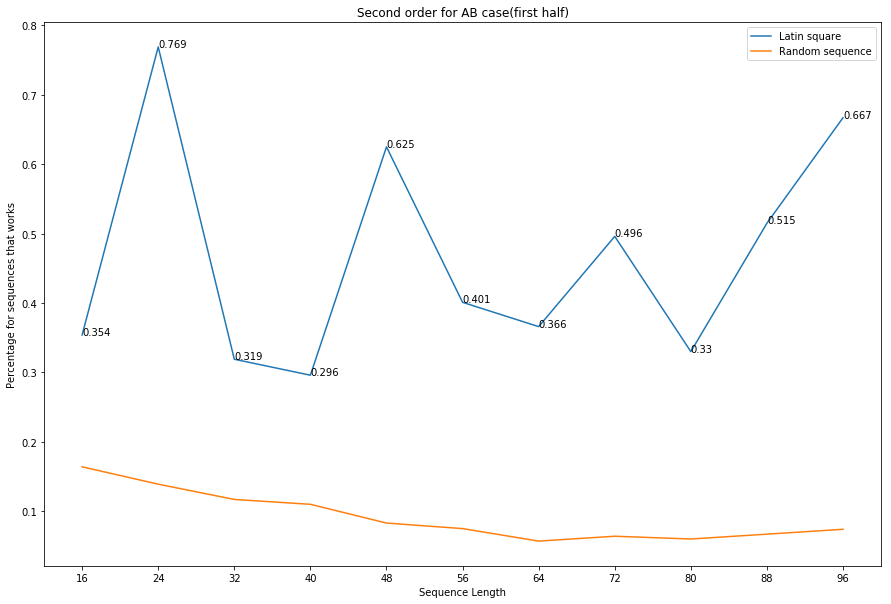

In [111]:
# Condition: (first half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, fh_true_percen.values(), label = "Latin square")
ax.plot(num_of_interest, random_true_percen.values(), label = "Random sequence")
for i, j in zip(num_of_interest, fh_true_percen.values()):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest)
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("Second order for AB case(first half)")
plt.legend()
plt.show()

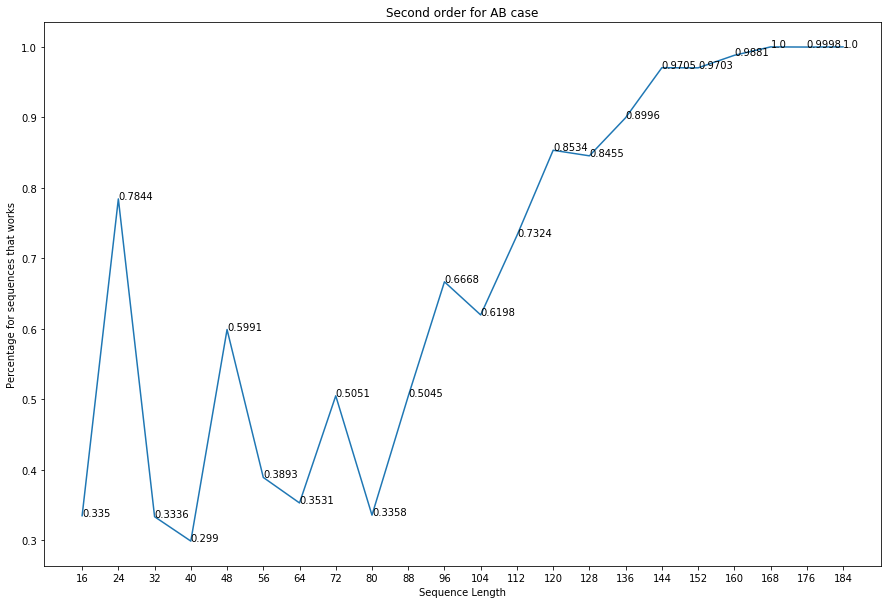

In [62]:
# Condition: (second half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, true_percen.values())
for i, j in zip(num_of_interest, true_percen.values()):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest)
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("Second order for AB case (second half)")
plt.show()

In [103]:
# Condition: ABC case, first order
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 10000 # Change to set numbers of runs
abc_true_percen = {}
random_true_percen = {}
num_of_interest = [9 + 9 * i for i in range(1, 144)]
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, seq_dict1  = initiation(3, "first")
        random_seq = random_sequence(2, num_of_interest[-1])
        if total_check(seq_dict1, var_dict, "first", to_shuffle = False, until = num, user_sequence = random_seq, 
                       to_print = False):
            ran_true_count += 1
        if total_check(seq_dict1, var_dict, "first", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abc_true_percen[num] = true_count / runs
    random_true_percen[num] = ran_true_count / runs

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abc_true_percen.values(), label = "Latin Square")
ax.plot(num_of_interest, random_true_percen.values(), label = "Random Sequence")
for i, j in zip(num_of_interest[::9], list(abc_true_percen.values())[::9]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::9])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("First order for ABC case")
plt.legend()
plt.show()

KeyboardInterrupt: 

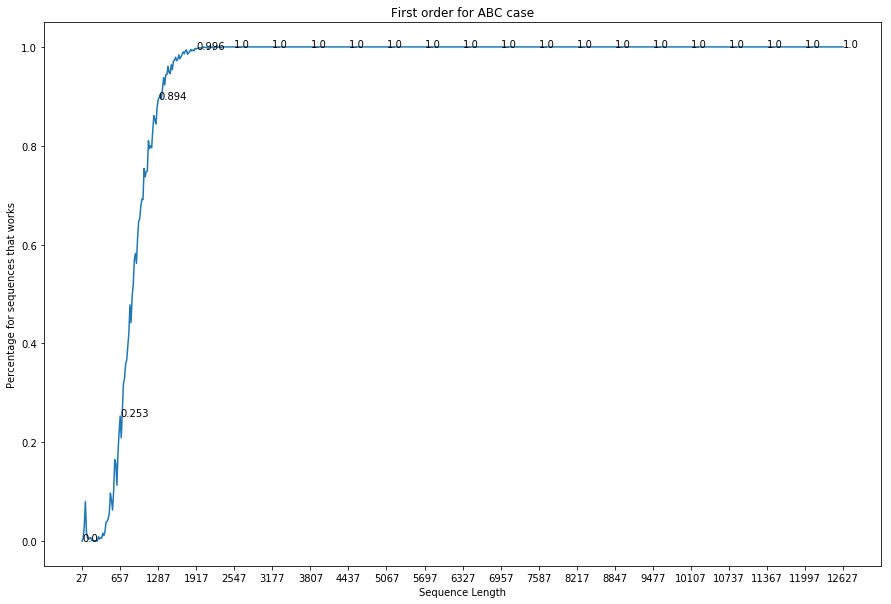

In [88]:
# Condition: ABC case, second order
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 1000 # Change to set numbers of runs
abc_true_percen = {}
num_of_interest = [9 + 18 * i for i in range(1, 702)]
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, seq_dict1  = initiation(3, "second")
        if total_check(seq_dict1, var_dict, "second", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abc_true_percen[num] = true_count / runs
    

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abc_true_percen.values())
for i, j in zip(num_of_interest[::35], list(abc_true_percen.values())[::35]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::35])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("Second order for ABC case")
plt.show()

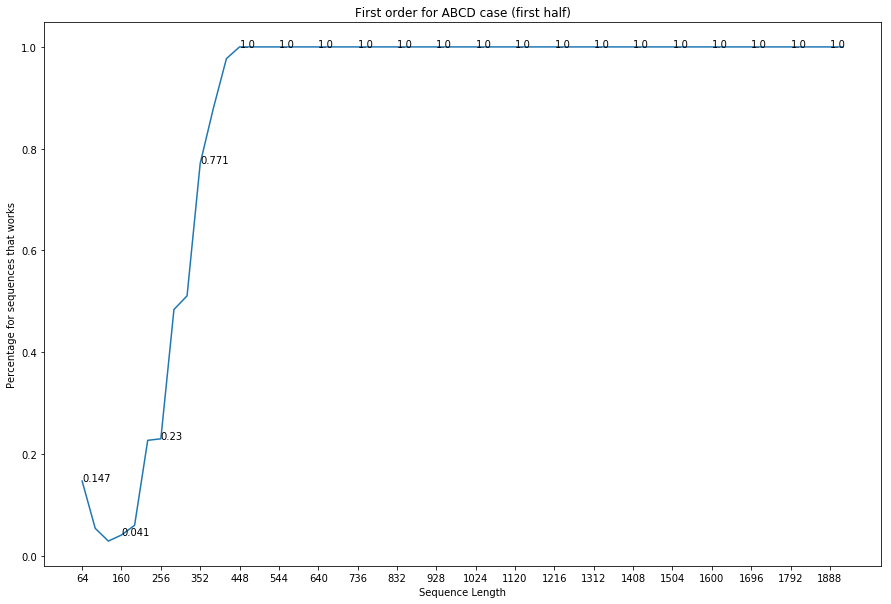

In [93]:
# Condition: ABCD case, first order (first half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 1000 # Change to set numbers of runs
abcd_true_percen = {}
num_of_interest = [32 + 32 * i for i in range(1, 60)] # 120 is full
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, (seq_dict1, seq_dict2, seq_dict3)  = initiation(4, "first")
        if total_check(seq_dict1, var_dict, "first", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abcd_true_percen[num] = true_count / runs
    

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abcd_true_percen.values())
for i, j in zip(num_of_interest[::3], list(abcd_true_percen.values())[::3]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::3])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("First order for ABCD case (first half)")
plt.show()

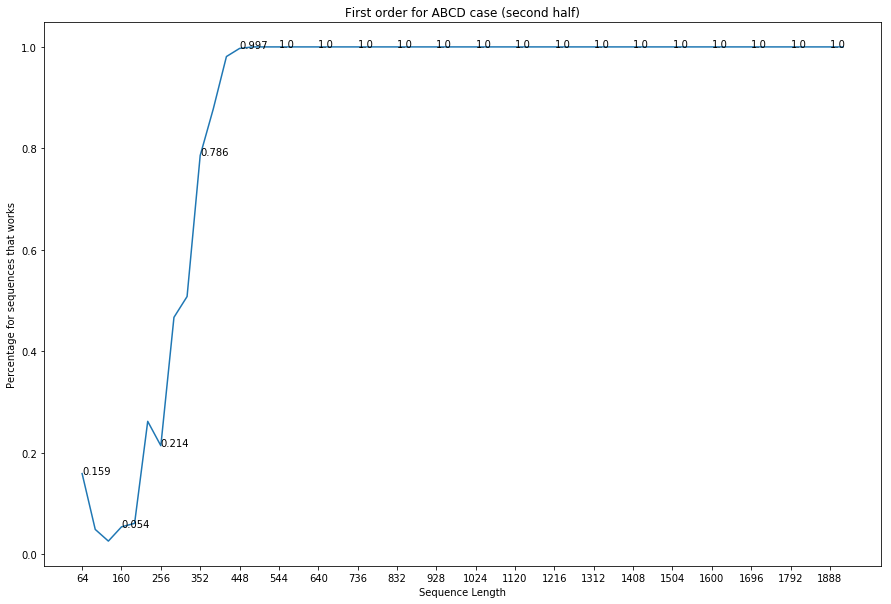

In [94]:
# Condition: ABCD case, first order (second half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 1000 # Change to set numbers of runs
abcd_true_percen = {}
num_of_interest = [32 + 32 * i for i in range(1, 60)] # 120 is full
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, (seq_dict1, seq_dict2, seq_dict3)  = initiation(4, "first")
        if total_check(seq_dict1, var_dict, "first", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abcd_true_percen[num] = true_count / runs
    

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abcd_true_percen.values())
for i, j in zip(num_of_interest[::3], list(abcd_true_percen.values())[::3]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::3])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("First order for ABCD case (second half)")
plt.show()

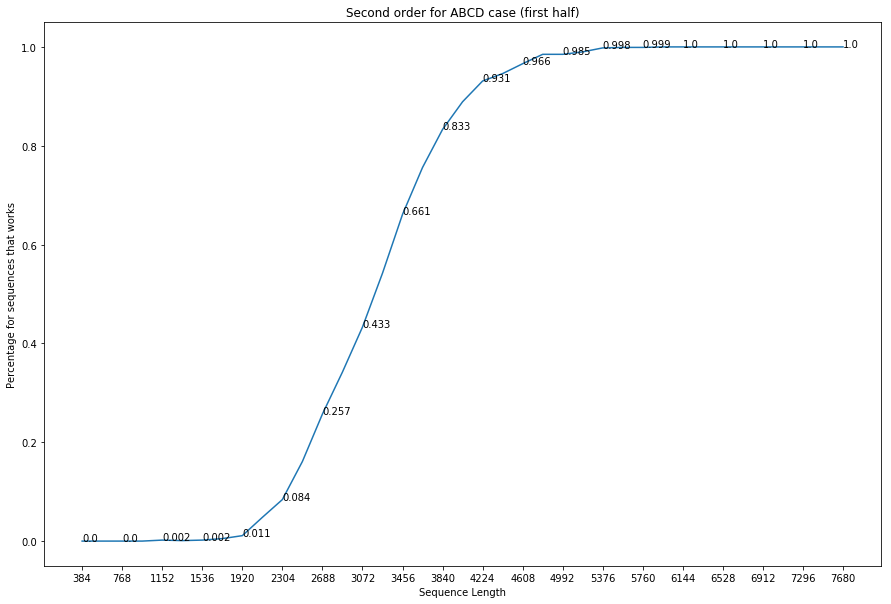

In [96]:
# Condition: ABCD case, second order (first half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 1000 # Change to set numbers of runs
abcd_true_percen = {}
num_of_interest = [192 + 192 * i for i in range(1, 40)]
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, (seq_dict1, seq_dict2, seq_dict3)  = initiation(4, "second")
        if total_check(seq_dict1, var_dict, "second", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abcd_true_percen[num] = true_count / runs
    

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abcd_true_percen.values())
for i, j in zip(num_of_interest[::2], list(abcd_true_percen.values())[::2]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::2])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("Second order for ABCD case (first half)")
plt.show()

In [97]:
# Condition: ABCD case, second order (second half)
# (score_list[-1] - score_list[0]) / score_list[-1] <= 0.25
# score_list[-1] <= 10 and score_list[0] != 0 and score_list[-1] - score_list[0] <= 2

runs = 1000 # Change to set numbers of runs
abcd_true_percen = {}
num_of_interest = [192 + 64 * i for i in range(1, 40)]
for num in num_of_interest:
    true_count = 0
    for i in range(runs):
        var_dict, (seq_dict1, seq_dict2, seq_dict3)  = initiation(4, "second")
        if total_check(seq_dict2, var_dict, "second", to_shuffle = True, until = num, to_print = False):
            true_count += 1
    abcd_true_percen[num] = true_count / runs
    

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(num_of_interest, abcd_true_percen.values())
for i, j in zip(num_of_interest[::2], list(abcd_true_percen.values())[::2]):
    ax.annotate(str(j),xy=(i,j))
ax.set_xticks(num_of_interest[::2])
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Percentage for sequences that works")
ax.set_title("Second order for ABCD case (second half)")
plt.show()

KeyboardInterrupt: 

In [14]:
l1 = [1,2,3,4,5]
l1[0:0]

[]